In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

start=3300
end=4000

#Load data (all .csv files in directory)
files=sorted(glob.glob("*.csv"))
x = np.loadtxt(files[1], skiprows=2, delimiter=',', unpack =True)[0][start:end]
tmp = np.loadtxt(files[1], skiprows=2, delimiter=',', unpack=True)[1][start:end]

n=len(files) #number of files
m=len(tmp)   #length of each array of spectrum data
data=np.ndarray((n,m))  #create big array to hold all data


i=0
for file in files:
    #tmp=np.loadtxt(file, skiprows=25, unpack=True)
    data[i][:]=np.loadtxt(file, skiprows=2, delimiter=',', unpack=True)[1][start:end]
    i+=1

In [2]:
#Normalize and smooth
for i in range(n):
    data[i]=savgol_filter(data[i],37,3)
    data[i]-=min(data[i])   #subtract minimum
    sum=np.sum(data[i])
    data[i]/=sum   #divide by sum (area normalization)

Text(0.5, 0, 'Wavenumber [per cm]')

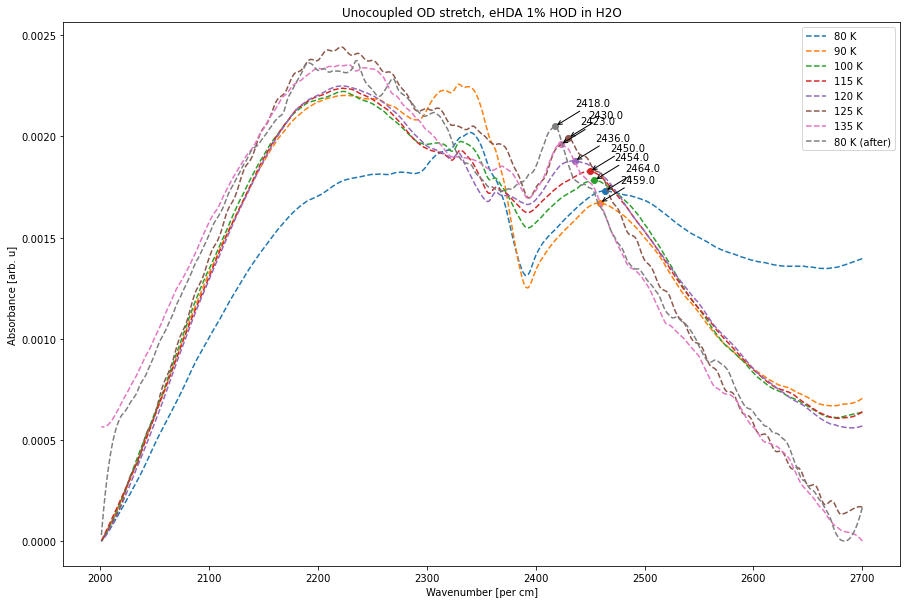

In [3]:
fig=plt.figure(figsize=(15,10))

include=[1,2,3,4,5,8,9,10]
legend=['80 K','90 K','100 K','115 K', '120 K', '125 K', '135 K', '80 K (after)']

peaks=[]

for i in include:
    peak=np.argmax(data[i][100:300])+100    #find peak
    plt.scatter(x[peak],data[i][peak])
    plt.annotate(str(x[peak]),xy=(x[peak],data[i][peak]),xytext=(20,20), textcoords='offset points', arrowprops=dict(arrowstyle= '->'))
    plt.plot(x,data[i], linestyle='--')
#plt.legend([files[i] for i in include]) #Show the legend of filenames, we could change this to temperatures manually
plt.legend(legend)
plt.title('Unocoupled OD stretch, eHDA 1% HOD in H2O')
plt.ylabel('Absorbance [arb. u]')
plt.xlabel('Wavenumber [per cm]')